# Overfitting - regularyzacja

## Regularyzacja dla Regresji Liniowej

In [34]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
 
standard_scaler = StandardScaler()

from sklearn.preprocessing import PolynomialFeatures
 
poly_features = PolynomialFeatures(degree=6)

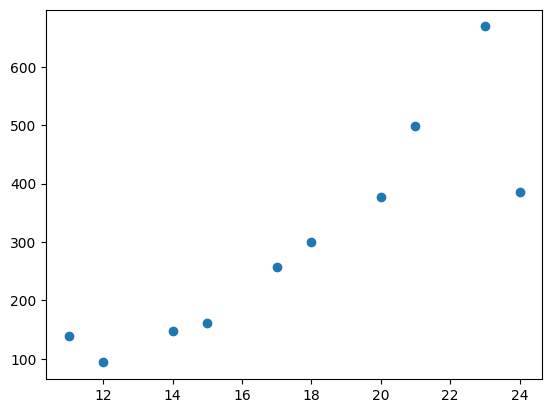

In [2]:
with open("./lin_reg_training.csv") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
x_train = data[:, 0]
y = data[:, 1]
plt.scatter(x_train, y)

In [3]:

x_train = standard_scaler.fit_transform(x_train.reshape(-1, 1))

# standard_scaler.fit(x_train)
# x_train = standard_scaler.transform(x_train)
# x_test = standard_scaler.transform(x_test)

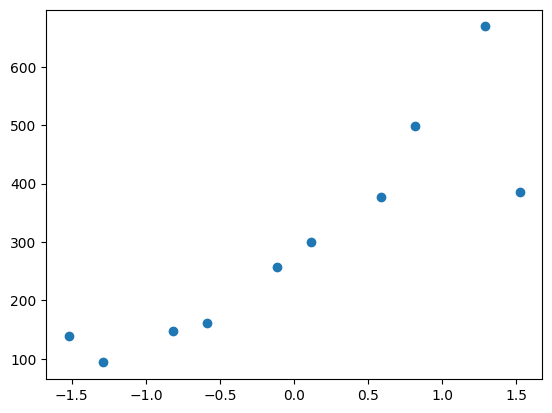

In [4]:
plt.scatter(x_train, y)

In [5]:

x_train_poly = poly_features.fit_transform(x_train.reshape(-1, 1))
print(x_train_poly)
#plt.scatter(x_train_poly, y)

[[ 1.00000000e+00 -1.52153491e+00  2.31506849e+00 -3.52245754e+00
   5.35954213e+00 -8.15473047e+00  1.24077071e+01]
 [ 1.00000000e+00 -1.28745262e+00  1.65753425e+00 -2.13399681e+00
   2.74741978e+00 -3.53717279e+00  4.55394237e+00]
 [ 1.00000000e+00 -8.19288030e-01  6.71232877e-01 -5.49933061e-01
   4.50553575e-01 -3.69133151e-01  3.02426372e-01]
 [ 1.00000000e+00 -5.85205736e-01  3.42465753e-01 -2.00412923e-01
   1.17282792e-01 -6.86345628e-02  4.01653398e-02]
 [ 1.00000000e+00 -1.17041147e-01  1.36986301e-02 -1.60330339e-03
   1.87652468e-04 -2.19630601e-05  2.57058175e-06]
 [ 1.00000000e+00  1.17041147e-01  1.36986301e-02  1.60330339e-03
   1.87652468e-04  2.19630601e-05  2.57058175e-06]
 [ 1.00000000e+00  5.85205736e-01  3.42465753e-01  2.00412923e-01
   1.17282792e-01  6.86345628e-02  4.01653398e-02]
 [ 1.00000000e+00  8.19288030e-01  6.71232877e-01  5.49933061e-01
   4.50553575e-01  3.69133151e-01  3.02426372e-01]
 [ 1.00000000e+00  1.28745262e+00  1.65753425e+00  2.13399681e+0

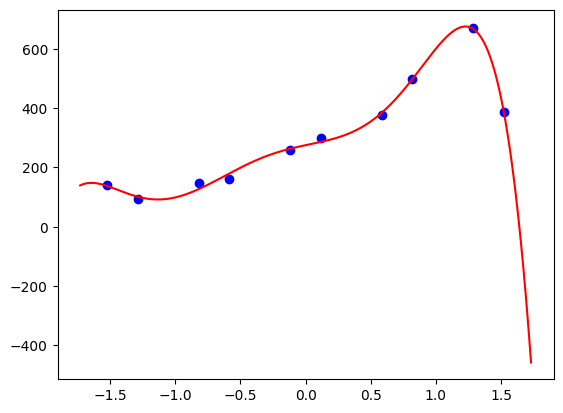

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train_poly, y)

# Generowanie punktów do wykresu
x_values = np.linspace(10, 24, 1000).reshape(-1, 1)  # Zakres wartości x dla wykresu
x_values = standard_scaler.fit_transform(x_values.reshape(-1, 1))
x_poly_values = poly_features.transform(x_values)  # Generowanie cech wielomianowych dla punktów x_values
y_pred = lin_reg.predict(x_poly_values)
plt.scatter(x_train, y, color='blue', label='Punkty oryginalne')
plt.plot(x_values, y_pred, color='red', label='Wykres dopasowany')


In [7]:
lin_reg.coef_

array([   0.        ,   93.25913541,  -31.84764993,  281.06603032,
        178.73031283, -123.53249456,  -72.33024354])

In [8]:

def cost_func(x_train, y, x_values, y_pred_values):
    m = y_pred_values.shape[0]
    y_pred_values = []
    for x_i, y_i in zip(x_train, y):
        closest_idx =  np.argmin(abs(x_values-x_i))
        # print(x_values[closest_idx])
        print(x_values[closest_idx], y_pred[closest_idx], y_i)
        y_pred_values.append(y_pred[closest_idx])
    cost = (1 / (2 * m)) * np.sum((y_pred[closest_idx] - y_i) ** 2)
    print(cost)
cost_func(x_train, y, x_values, y_pred)

[-1.52247342] 137.37351220316333 139.66148459455079
[-1.28691439] 100.97502156801073 93.61152898158836
[-0.81926044] 126.97841152387346 147.53490822010792
[-0.58370141] 180.14534342096982 160.79332867608565
[-0.11604746] 263.4149328115569 257.75693508080855
[0.11604746] 285.9332120901572 300.58686315551597
[0.58370141] 384.06792185560835 377.37446403292256
[0.81926044] 497.7047054807815 498.17725977247966
[1.28691439] 667.0058708411677 669.0168866955671
[1.52247342] 384.12553365290586 385.44267757740386
0.0008674340589209938


In [9]:
alpha=0.01
eps=1e-8
def h_fun_ndim(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: 
    '''
    return theta.T @ X
 
def calculate_cost_ndim(X, y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    m = y.shape[1]
    predicted_y = h_fun_ndim(X, theta)
    return  (1 / (2 * m)) * np.sum((predicted_y - y) ** 2)

def gradient_descent_ndim(X, y, theta, alpha=alpha, eps=eps, max_iter=100000):
    '''
    :param X: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta: początkowy parametr modelu regresji liniowej jednej zmiennej
    :param alpha: współczynnik uczenia (learning rate)
    :param eps: tolerancja zmiany kosztu, aby zakończyć iterację
    :return: theta- optymalne parametry modelu regresji liniowej
    '''
    m = X.shape[0]
    cost_history = [] 

    for i in range(max_iter):
        h_y_diff = (h_fun_ndim(X, theta) - y)
        gradient = h_y_diff @ X.T
        theta = theta - alpha * gradient.T / m
        
        cost = calculate_cost_ndim(X, y, theta)
        cost_history.append(cost)
        if i > 0 and abs(cost - cost_history[i-1]) < eps:
            break

    return theta, h_fun_ndim(X, theta), cost_history[-1]


print(x_train_poly.shape)
# # y_scale = y.max()
# # y_scaled = y / y_scale
# X_scale = x_train_poly.T.max(axis=1)
# X_scale.shape = [-1, 1]
# X_scaled = x_train_poly.T / X_scale
# # print(y_scaled.reshape(1, -1).shape)
# print(X_scaled.shape)
theta = np.array([[0], [0], [0], [0], [0], [0], [0]])
th, points, cost = gradient_descent_ndim(x_train_poly.T, y.reshape(1, -1), theta)
print(th, points, cost)

(10, 7)
[[ 275.04950382]
 [  93.25914563]
 [ -31.71111936]
 [ 281.06601323]
 [ 178.58690408]
 [-123.5324889 ]
 [ -72.29169666]] [[137.23993483 101.02326165 126.99035244 179.80463172 263.28535304
  286.0115097  384.65753158 497.73766844 666.83315703 386.3719196 ]] 57.30894565449782


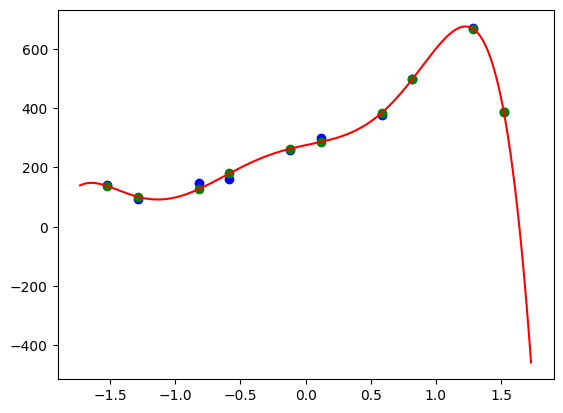

In [10]:
x_new = np.linspace(10, 24, 1000).reshape(-1, 1)
x_values = standard_scaler.fit_transform(x_new.reshape(-1, 1))
x_new_values = poly_features.transform(x_values)
result = th.T @ x_new_values.T
plt.scatter(x_train, y, color='blue', label='Punkty oryginalne')
plt.scatter(x_train, points, color='g', label='Punkty oryginalne')
plt.plot(x_values, result.T, color='red', label='Wykres dopasowany')

4769.487462807049

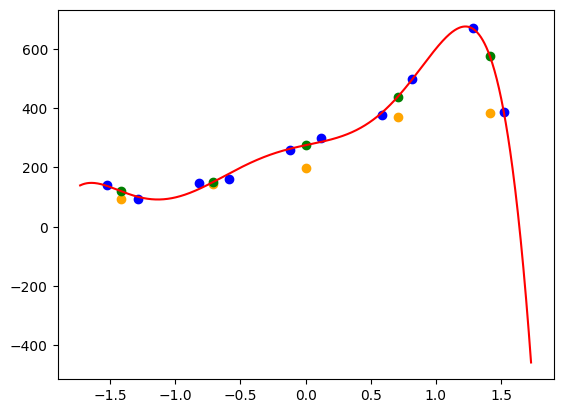

In [11]:
with open("./lin_reg_test.csv") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
x_test = data[:, 0]
y_test = data[:, 1]
# plt.scatter(x_test, y_test)
x_test_vals = standard_scaler.fit_transform(x_test.reshape(-1, 1))
x_test_values = poly_features.transform(x_test_vals)
result_test = th.T @ x_test_values.T
# x_poly_values_test = poly_features.transform(x_test.reshape(-1, 1))  # Generowanie cech wielomianowych dla punktów x_values
# y_pred_test = lin_reg.predict(x_poly_values_test)
plt.scatter(x_train, y, color='blue', label='Punkty oryginalne')
plt.scatter(x_test_vals , y_test, color='orange', label='Punkty testowe')
plt.scatter(x_test_vals, result_test.T, color='green', label='Wykres dopasowany')
plt.plot(x_values, result.T, color='red', label='Wykres dopasowany')
calculate_cost_ndim(x_test_values.T, y_test.reshape(-1, 1).T, th)


In [12]:
alpha=0.01
eps=1e-8
lambda_ = 10
def h_fun_ndim(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: 
    '''
    return theta.T @ X
 
def calculate_cost_ndim(X, y, theta, lambda_):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    m = y.shape[1]
    predicted_y = h_fun_ndim(X, theta)
    sum_of_thetas = (theta[1:, :] ** 2).sum()
    return  (1 / (2 * m)) * np.sum((predicted_y - y) ** 2) + sum_of_thetas * lambda_ / (2 * m)

def gradient_descent_ndim(X, y, theta, alpha=alpha, eps=eps, lambda_=lambda_, max_iter=100000):
    '''
    :param X: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta: początkowy parametr modelu regresji liniowej jednej zmiennej
    :param alpha: współczynnik uczenia (learning rate)
    :param eps: tolerancja zmiany kosztu, aby zakończyć iterację
    :return: theta- optymalne parametry modelu regresji liniowej
    '''
    m = X.shape[0]
    cost_history = [] 

    for i in range(max_iter):
        h_y_diff = (h_fun_ndim(X, theta) - y)
        gradient = h_y_diff @ X.T
        theta_reg = np.concatenate([np.zeros((1, 1)), theta[1:, :]], axis=0)
        theta = theta - alpha * (gradient.T +lambda_ * theta_reg) / m
        
        cost = calculate_cost_ndim(X, y, theta, lambda_)
        cost_history.append(cost)
        if i > 0 and abs(cost - cost_history[i-1]) < eps:
            break

    return theta, h_fun_ndim(X, theta), cost_history[-1]


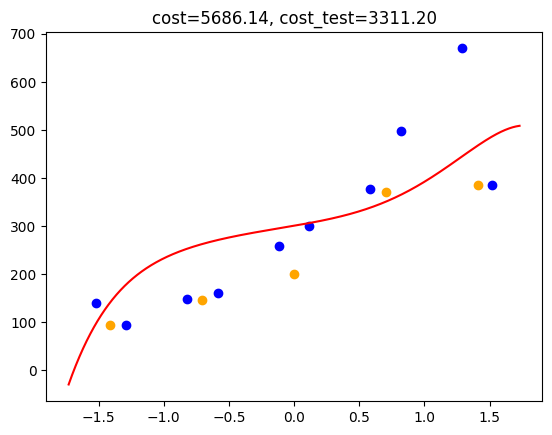

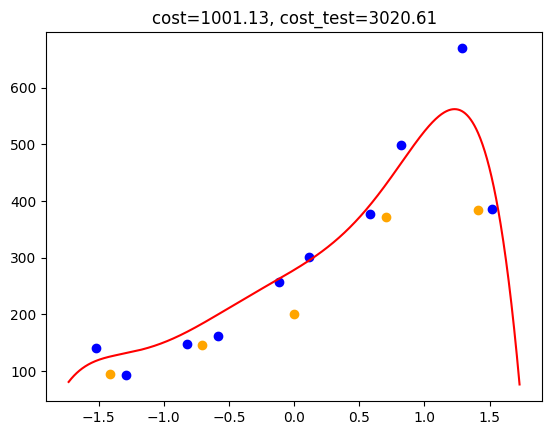

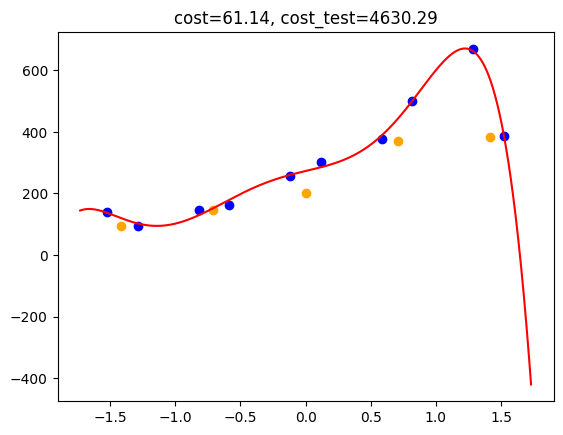

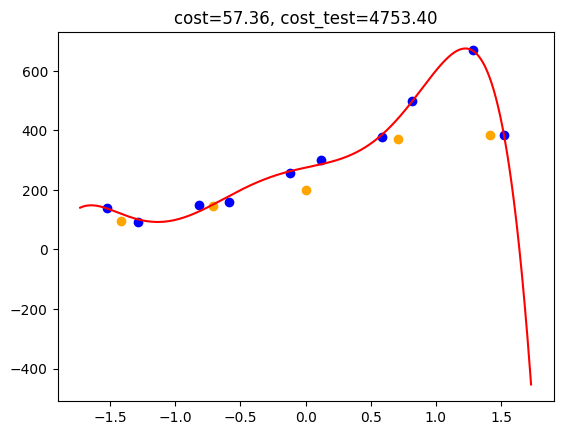

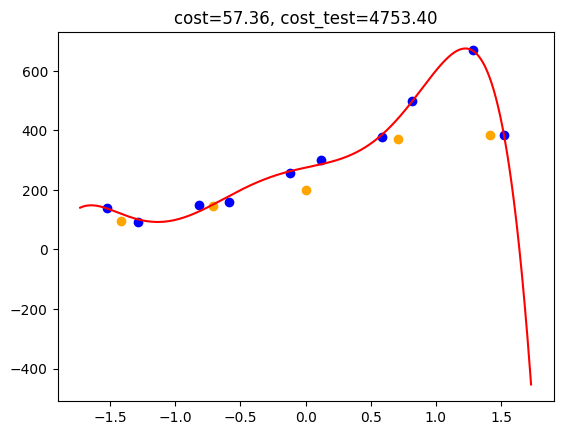

In [13]:
lambdas = [10, 1, 0.01, 0.001, 0.001]
x_new = np.linspace(10, 24, 1000).reshape(-1, 1)
x_values = standard_scaler.fit_transform(x_new.reshape(-1, 1))
x_new_values = poly_features.transform(x_values)
for lambda_ in lambdas:
    theta = np.array([[0], [0], [0], [0], [0], [0], [0]])
    th, points, cost = gradient_descent_ndim(x_train_poly.T, y.reshape(1, -1), theta, lambda_=lambda_)
    # print(th, points, cost)

    result = th.T @ x_new_values.T
    fig = plt.figure("Figure 1")
    plt.scatter(x_train, y, color='blue', label='Punkty oryginalne')
    plt.scatter(x_test_vals , y_test, color='orange', label='Punkty testowe')
    plt.plot(x_values, result.T, color='red', label='Wykres dopasowany')
    cost_test = calculate_cost_ndim(x_test_values.T, y_test.reshape(1, -1), th, 0)
    cost = calculate_cost_ndim(x_train_poly.T,  y.reshape(1, -1), th, 0)
    plt.title(f'cost={cost:.2f}, cost_test={cost_test:.2f}')
    plt.show()

## Regresja Logistyczna

(50,)


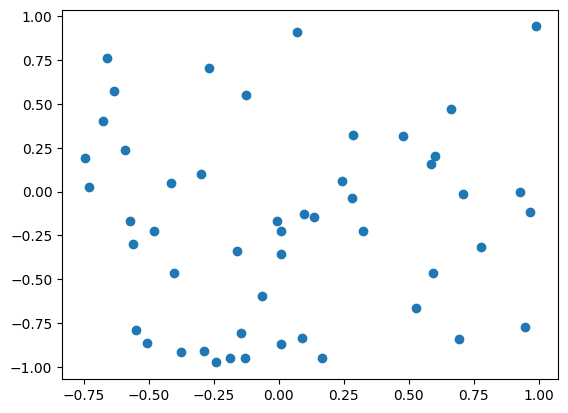

In [36]:
with open("./logi_reg_training.csv") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
x_train_raw = data[:, 0:2]
x1 = x_train_raw[:, 0]
x2 = x_train_raw[:, 1]
y = data[:, 2]
x_train = np.vstack([x1, x2])
plt.scatter(x1, x2)
print(y.shape)

In [16]:
lambdas = [10, 1, 0.5, 0.1, 0.05, 0.01]
from sklearn.preprocessing import StandardScaler
 
standard_scaler = StandardScaler()

from sklearn.preprocessing import PolynomialFeatures
 
poly_features = PolynomialFeatures(degree=6)
# x_new = np.linspace(10, 24, 1000).reshape(-1, 1)
x_train_log_values_raw = standard_scaler.fit_transform(x_train.T)
# x1 = x1.reshape(1, -1)
# x2 = x2.reshape(1, -1)
print(x_train_log_values_raw.shape)
x_train_poly_log = poly_features.fit_transform(x_train_log_values_raw)
# # x_train_poly_log = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2, x1**2, x1**2, x1**3, x1**4, x1**5, x1**6])
print(x_train_poly_log.shape)

(50, 2)
(50, 28)


In [17]:
alpha=0.1
eps = 1e-7
lambda_=10
def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

def calculate_cost(X, y, theta, lambda_):
    m=y.shape[0]
    h = h_fun(X, theta)
    y_1 = -y*np.log(h)
    y_0 = -(1-y)*np.log(1-h)
    sum_of_thetas = (theta[1:, :] ** 2).sum()
    return (y_1 + y_0).sum() / X.shape[1] + sum_of_thetas * lambda_ / (2 * m)

def gradient_descent_ndim(X, y, theta, alpha=alpha, eps=eps, lambda_=lambda_, max_iter=100000):
    '''
    :param X: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta: początkowy parametr modelu regresji liniowej jednej zmiennej
    :param alpha: współczynnik uczenia (learning rate)
    :param eps: tolerancja zmiany kosztu, aby zakończyć iterację
    :return: theta- optymalne parametry modelu regresji liniowej
    '''
    m = X.shape[0]
    cost_history = [] 

    for i in range(max_iter):
        h_y_diff = (h_fun(X, theta) - y)
        gradient = h_y_diff @ X.T
        theta_reg = np.concatenate([np.zeros((1, 1)), theta[1:, :]], axis=0)
        theta = theta - alpha * (gradient.T +lambda_ * theta_reg) / m
        
        cost = calculate_cost(X, y, theta, lambda_)
        cost_history.append(cost)

        if i > 0 and abs(cost - cost_history[i-1]) < eps:
            break

    return theta, h_fun(X, theta)

In [19]:
theta = np.zeros((28, 1))
print(theta.shape)
th, h_x = gradient_descent_ndim(x_train_poly_log.T, y, theta, alpha, eps, lambda_=0)

(28, 1)


C:\Users\oem\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\oem\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


[[ 0.67028257]
 [12.38979987]
 [ 6.7234265 ]
 [ 6.18219284]
 [-3.82000781]
 [-0.63651847]
 [-3.98203722]
 [ 5.71243017]
 [-1.83790843]
 [ 4.17694423]
 [ 0.42727709]
 [-1.80393076]
 [ 1.33454807]
 [-0.7766808 ]
 [-0.05827672]
 [-1.99679049]
 [ 3.35249125]
 [-1.25352741]
 [ 1.67488516]
 [-0.36302431]
 [ 1.78069642]
 [-5.95129511]
 [ 0.82644362]
 [ 0.24741843]
 [ 0.20845723]
 [ 0.46235605]
 [ 0.03206665]
 [ 0.03616557]] [[1.15783690e-016 9.61679495e-001 3.99743646e-003 9.99999997e-001
  2.73650087e-006 9.99937548e-001 9.38830275e-011 1.00000000e+000
  2.11354018e-008 3.04888209e-029 4.58819432e-011 1.07096259e-010
  6.18786752e-004 2.21748656e-018 6.36614405e-007 6.21956131e-005
  9.99932625e-001 4.38887696e-001 9.99994996e-001 1.00000000e+000
  8.70748566e-083 1.36754480e-029 9.82308520e-001 1.00000000e+000
  1.00000000e+000 9.18673142e-009 1.00000000e+000 2.69294415e-017
  1.09782717e-019 9.99994706e-001 9.99996859e-001 3.14648918e-004
  9.89437481e-001 1.08531563e-016 1.60209025e-114 1

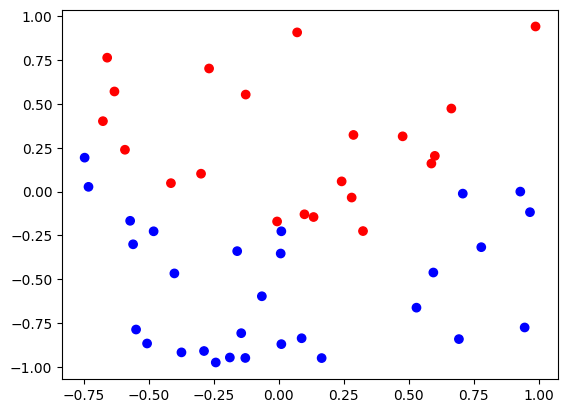

In [20]:
print(th, h_x)
colors = ['r' if val > 0.5  else 'b' for val in h_x.tolist()[0]]
# plt.scatter(x_train_log_values_raw[:, 0], x_train_log_values_raw[:, 1], c=colors)
plt.scatter(x1, x2, c=colors)

### Test data

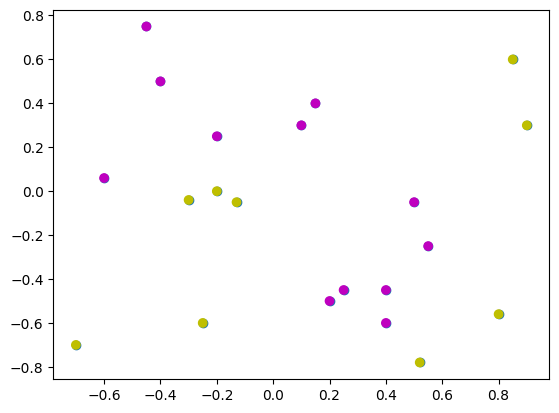

In [21]:
with open("./logi_reg_test.csv") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
x_test_raw = data[:, 0:2]
x1_t = x_test_raw[:, 0]
x2_t = x_test_raw[:, 1]
y_t = data[:, 2]
x_test_t = np.vstack([x1_t, x2_t])
plt.scatter(x1_t, x2_t)
x_test_vals_log = standard_scaler.transform(x_test_t.T)
x_test_values_log = poly_features.transform(x_test_vals_log)
result_test_log = th.T @ x_test_values_log.T
colorst = ['m' if val > 0.5  else 'y' for val in result_test_log.tolist()[0]]
# plt.scatter(x_train_log_values_raw[:, 0], x_train_log_values_raw[:, 1], c=colors)
plt.scatter(x1_t, x2_t, c=colorst)
# plt.scatter(x_train, y, color='blue', label='Punkty oryginalne')
# plt.scatter(x_test_vals , y_test, color='orange', label='Punkty testowe')
# plt.scatter(x_test_vals, result_test.T, color='green', label='Wykres dopasowany')
# plt.plot(x_values, result.T, color='red', label='Wykres dopasowany')
# calculate_cost_ndim(x_test_values.T, y_test.reshape(-1, 1).T, th)

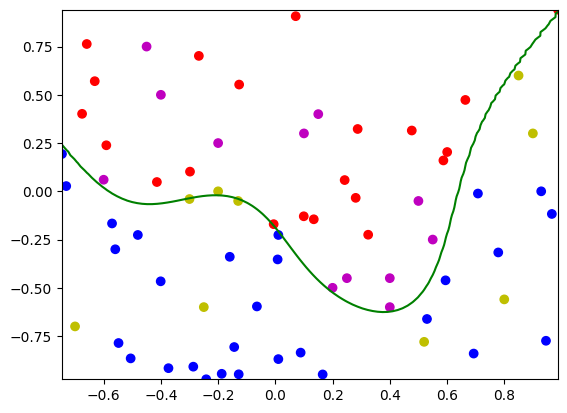

In [22]:
x1_range = np.linspace(x1.min(), x1.max(), 100)
x2_range = np.linspace(x2.min(), x2.max(), 100)
x1x1, x2x2 = np.meshgrid(x1_range, x2_range)
points = np.c_[x1x1.ravel(), x2x2.ravel()]
x1x2_range_comb = standard_scaler.transform(points)
x1x2_range_comb = poly_features.transform(x1x2_range_comb)
X_range_comb = x1x2_range_comb.T
h_range_comb = h_fun(X_range_comb, th)
h_range_comb.shape = x1x1.shape
result_test_log = th.T @ x_test_values_log.T
colors1 = ['m' if val > 0.5  else 'y' for val in result_test_log.tolist()[0]]
fig = plt.figure("Figure 1")
plt.contour(x1x1, x2x2, h_range_comb, levels=[0.5], colors='g')
plt.scatter(x1, x2, c=colors)
plt.scatter(x1_t, x2_t, c=colors1)
plt.show()

C:\Users\oem\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\oem\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


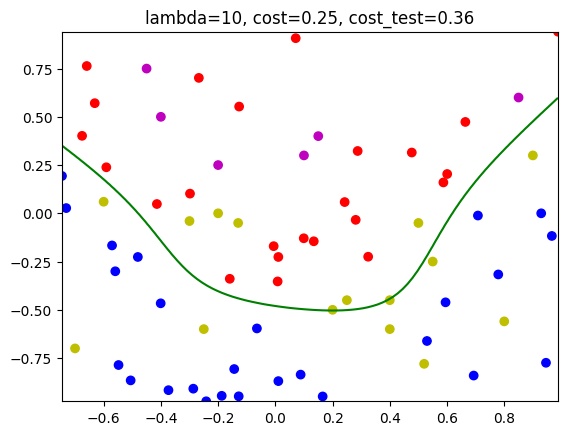

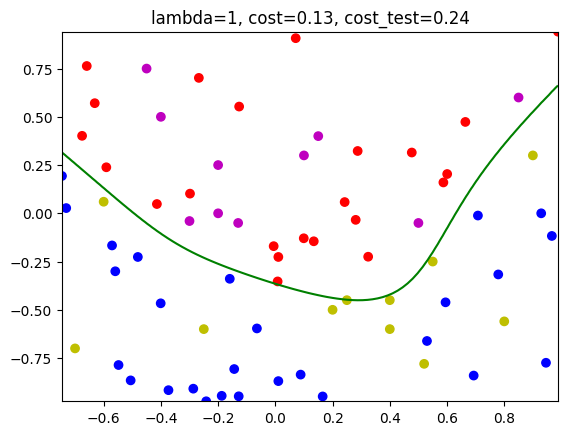

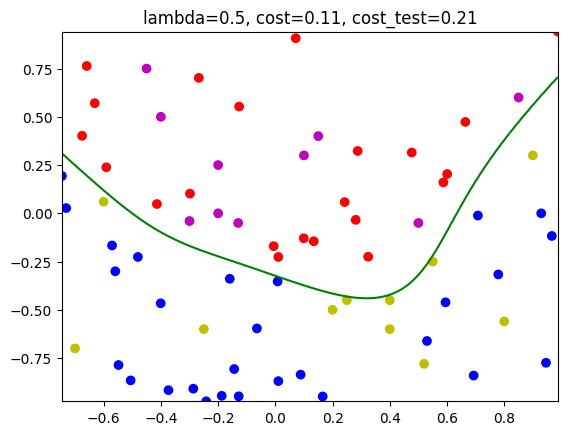

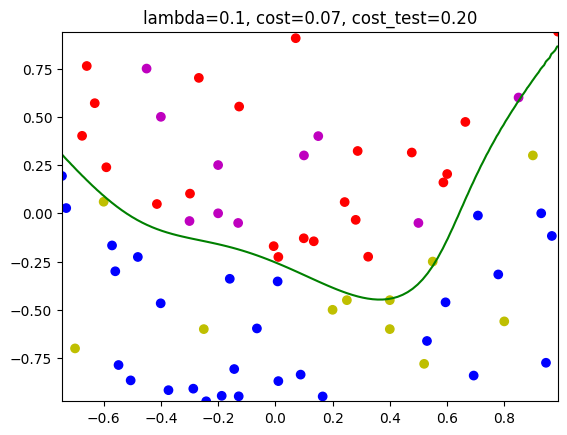

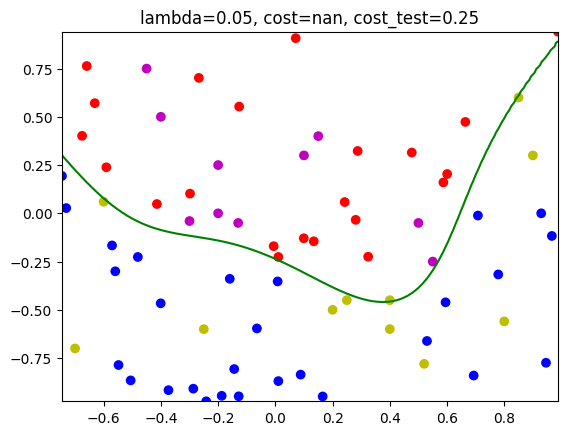

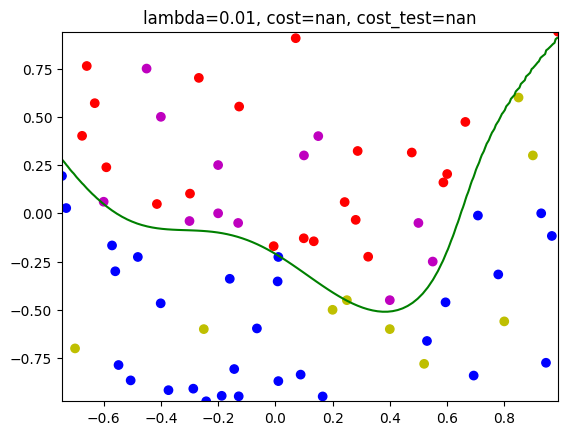

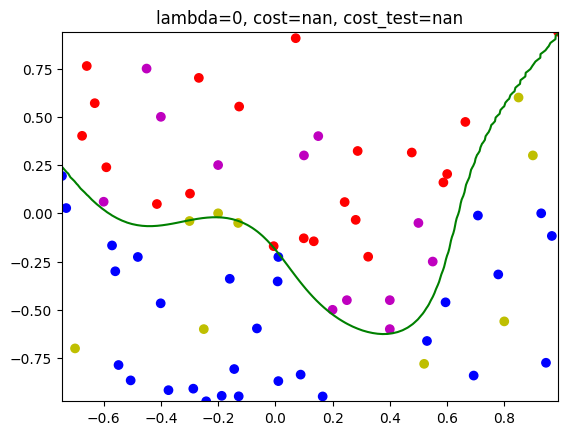

In [23]:

x1_range = np.linspace(x1.min(), x1.max(), 100)
x2_range = np.linspace(x2.min(), x2.max(), 100)
x1x1, x2x2 = np.meshgrid(x1_range, x2_range)
points = np.c_[x1x1.ravel(), x2x2.ravel()]
x1x2_range_comb = standard_scaler.transform(points)
x1x2_range_comb = poly_features.transform(x1x2_range_comb)
X_range_comb = x1x2_range_comb.T
for lambda_ in [10, 1, 0.5, 0.1, 0.05, 0.01, 0]:
    theta = np.zeros((28, 1))
    th, points = gradient_descent_ndim(x_train_poly_log.T, y.reshape(1, -1), theta, lambda_=lambda_)
    colors = ['r' if val > 0.5  else 'b' for val in points.tolist()[0]]
    h_range_comb = h_fun(X_range_comb, th)
    h_range_comb.shape = x1x1.shape
    result_test_log = th.T @ x_test_values_log.T
    colors1 = ['m' if val > 0.5  else 'y' for val in result_test_log.tolist()[0]]
    fig = plt.figure("Figure 1")
    plt.contour(x1x1, x2x2, h_range_comb, levels=[0.5], colors='g')
    plt.scatter(x1, x2, c=colors)
    plt.scatter(x1_t, x2_t, c=colors1)
    cost_test = calculate_cost(x_test_values_log.T, y_t.reshape(1, -1), th, 0)
    cost = calculate_cost(x_train_poly_log.T,  y.reshape(1, -1), th, 0)
    plt.title(f'lambda={lambda_}, cost={cost:.2f}, cost_test={cost_test:.2f}')
    plt.show()

(28, 10000)


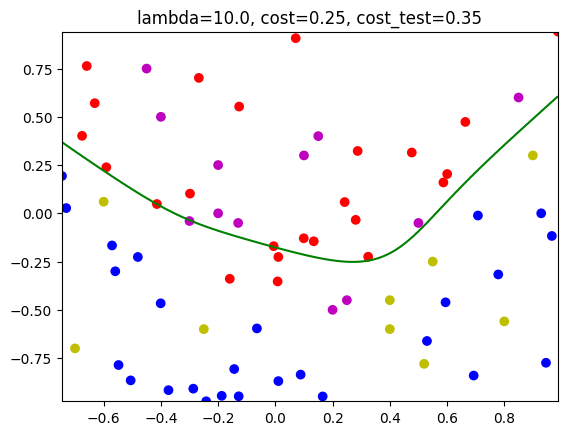

(28, 10000)


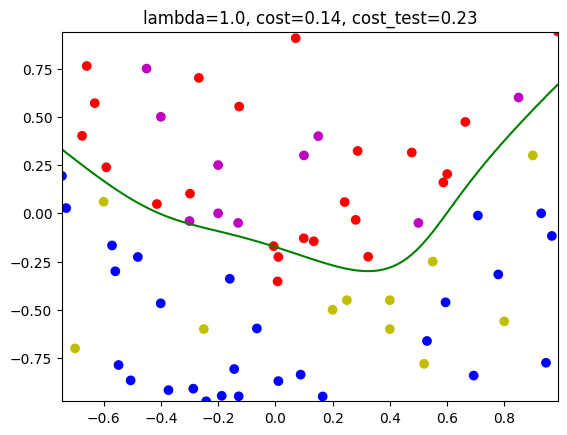

(28, 10000)


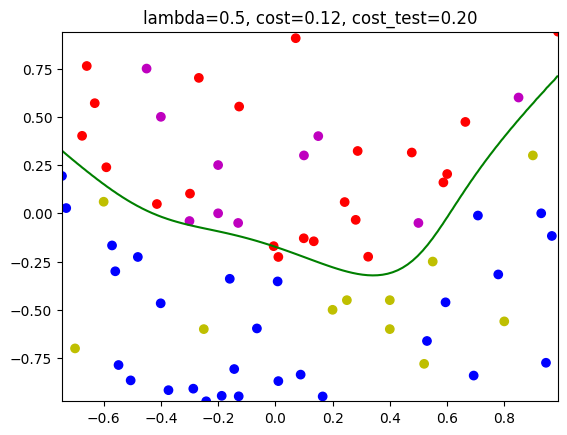

(28, 10000)


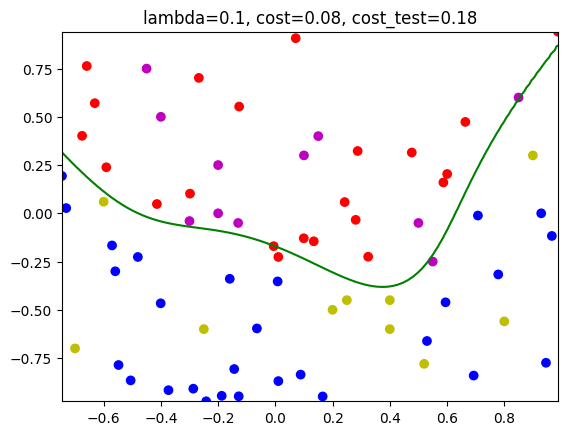

(28, 10000)


C:\Users\oem\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\oem\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


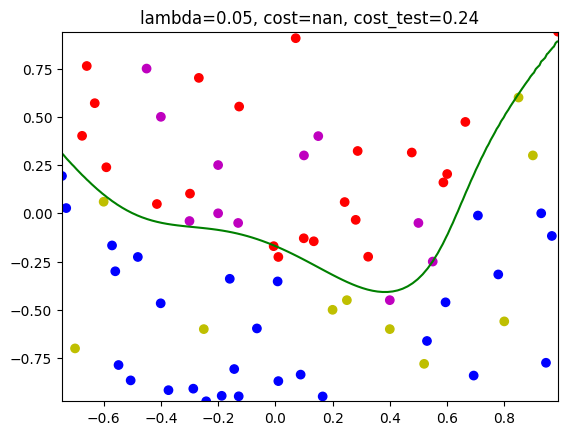

C:\Users\oem\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\oem\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


(28, 10000)


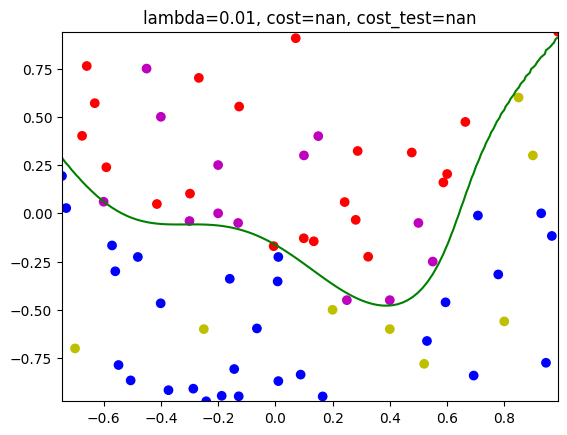

C:\Users\oem\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


(28, 10000)


C:\Users\oem\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


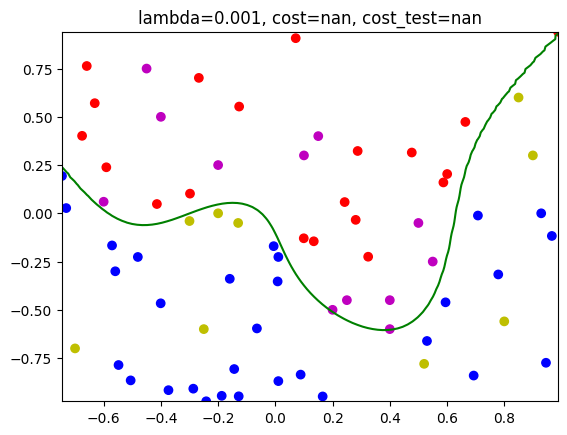

In [57]:
from sklearn.linear_model import LogisticRegression
#x_test_values_log, y_t
#x_train_poly_log, y
for lambda_ in [0.1, 1, 2, 10, 20, 100, 1000]:
    log_regr = LogisticRegression(penalty='l2', C=lambda_)
    log_regr.fit(x_train_poly_log, y)
    th_regr_log = log_regr.coef_
    y_train_pred = log_regr.predict(x_train_poly_log)
    y_test_pred = log_regr.predict(x_test_values_log)
    colors_train = ['r' if val == 1  else 'b' for val in y_train_pred]
    colors_test = ['m' if val == 1  else 'y' for val in y_test_pred]
    print(X_range_comb.shape)
    h_range_comb = h_fun(X_range_comb, th_regr_log.T)
    h_range_comb.shape = x1x1.shape

    fig = plt.figure("Figure 1")
    plt.contour(x1x1, x2x2, h_range_comb, levels=[0.5], colors='g')
    plt.scatter(x1, x2, c=colors_train)
    plt.scatter(x1_t, x2_t, c=colors_test)
    cost_test = calculate_cost(x_test_values_log.T, y_t.reshape(1, -1), th_regr_log.T, 0)
    cost = calculate_cost(x_train_poly_log.T,  y.reshape(1, -1), th_regr_log.T, 0)
    plt.title(f'lambda={1/lambda_}, cost={cost:.2f}, cost_test={cost_test:.2f}')
    plt.show()

In [58]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
 
data = load_iris()
x = data.data
y = data.target

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)

In [63]:
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
 
log_regr = LogisticRegression(penalty='none')
log_regr.fit(x_train, y_train)
y_train_probab = log_regr.predict_proba(x_train)
y_test_probabs = log_regr.predict_proba(x_test)
cost_train = log_loss(y_train, y_train_probab)
cost_test = log_loss(y_test, y_test_probabs)
y_test_pred = log_regr.predict(x_test)
result_report = classification_report(y_test, y_test_pred)
print(f'Bez regularyzacji, bez cech wielomianowych, koszt na zbiorze uczącym wyniosi: {cost_train}, a na zbiorze testowym:{cost_test}')
print(result_report)

Bez regularyzacji, bez cech wielomianowych, koszt na zbiorze uczącym wyniosi: 0.04542178741401956, a na zbiorze testowym:0.040975924318622264
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        17
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [64]:
poly_features = PolynomialFeatures(degree=6)
x_train = poly_features.fit_transform(x_train)
x_test = poly_features.transform(x_test) 
log_regr = LogisticRegression(penalty='none')
log_regr.fit(x_train, y_train)
y_train_probab = log_regr.predict_proba(x_train)
y_test_probabs = log_regr.predict_proba(x_test)
cost_train = log_loss(y_train, y_train_probab)
cost_test = log_loss(y_test, y_test_probabs)
y_test_pred = log_regr.predict(x_test)
result_report = classification_report(y_test, y_test_pred)
print(f'Bez regularyzacji, z cech wielomianowych, koszt na zbiorze uczącym wyniosi: {cost_train}, a na zbiorze testowym:{cost_test}')
print(result_report)

Bez regularyzacji, bez cech wielomianowych, koszt na zbiorze uczącym wyniosi: 5.380867279893659e-06, a na zbiorze testowym:1.266866906968779
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.94        17
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [66]:
for lambda_ in [0.1, 1, 2, 10, 20]:
    log_regr = LogisticRegression(penalty='l2', C=lambda_)
    log_regr.fit(x_train, y_train)
    y_train_probab = log_regr.predict_proba(x_train)
    y_test_probabs = log_regr.predict_proba(x_test)
    cost_train = log_loss(y_train, y_train_probab)
    cost_test = log_loss(y_test, y_test_probabs)
    y_test_pred = log_regr.predict(x_test)
    result_report = classification_report(y_test, y_test_pred)
    print(f'Regularyzacja, z cech wielomianowych, koszt na zbiorze uczącym wyniosi: {cost_train}, a na zbiorze testowym:{cost_test}')
    print(result_report)

Regularyzacja, z cech wielomianowych, koszt na zbiorze uczącym wyniosi: 0.10023346763532137, a na zbiorze testowym:0.12372326478541473
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

Regularyzacja, z cech wielomianowych, koszt na zbiorze uczącym wyniosi: 0.04649155934111592, a na zbiorze testowym:0.06320110555467562
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00

c:\Users\oem\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\oem\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l